<a href="https://colab.research.google.com/github/OfriA/AppliedProject52056/blob/main/data/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = "https://github.com/OfriA/AppliedProject52056/raw/refs/heads/main/data/ER_data.xlsx"
data = pd.read_excel(url)

data.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,pba17,pba18,pba19,pba20,pba21,pba22,pba23,publication,publication_1_TEXT,notes
0,2023-11-10 05:03:59,2023-11-10 05:18:24,0,77.137.72.8,100,864,1,2023-11-10 05:18:24.970,R_2zx6JDdyuRWIFe7,NaN,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
1,2023-11-11 11:48:18,2023-11-11 12:05:28,0,89.139.151.60,100,1030,1,2023-11-11 12:05:29.243,R_87VewwKW25MdOWR,NaN,...,0.0,0.0,0.0,0.0,2.0,1.0,0.0,NaN,NaN,אספקט נוסף שתורם ללחץ משפחתי או כך שאנו מארחים...
2,2023-11-11 12:15:06,2023-11-11 12:28:18,0,77.137.65.231,100,791,1,2023-11-11 12:28:18.984,R_2UXkBlYFVZKykUc,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,לא
3,2023-11-11 12:32:33,2023-11-11 12:59:45,0,2.52.150.227,100,1631,1,2023-11-11 12:59:45.938,R_3NJoeQvJTS5YS4s,NaN,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN
4,2023-11-11 13:21:15,2023-11-11 13:51:44,0,77.137.77.167,100,1829,1,2023-11-11 13:51:45.899,R_2wHVGst8nWwQV1c,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN


In [3]:
print(data.columns)

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName',
       ...
       'pba17', 'pba18', 'pba19', 'pba20', 'pba21', 'pba22', 'pba23',
       'publication', 'publication_1_TEXT', 'notes'],
      dtype='object', length=344)


In [4]:
CBCL_features = data.columns[240:283].to_list()
self_exposure_features = ['SelfExposure_1', 'SelfExposure_2', 'SelfExposure_3', 'SelfExposure_4', 'SelfExposure_5', 'SelfExposure_6']
other_exposure_features = ['OtherExposure_6', 'OtherExposure_7', 'OtherExposure_8', 'OtherExposure_9', 'OtherExposure_10', 'OtherExposure_11', 'OtherExposure_12']

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659 entries, 0 to 658
Columns: 344 entries, StartDate to notes
dtypes: datetime64[ns](3), float64(299), int64(13), object(29)
memory usage: 1.7+ MB


In [6]:
self_exposure_features = ['SelfExposure_1', 'SelfExposure_2', 'SelfExposure_3', 'SelfExposure_4', 'SelfExposure_5', 'SelfExposure_6']
other_exposure_features = ['OtherExposure_6', 'OtherExposure_7', 'OtherExposure_8', 'OtherExposure_9', 'OtherExposure_10', 'OtherExposure_11', 'OtherExposure_12']

data['self_exposure_score'] = np.sum(data[self_exposure_features], axis=1)
data['other_exposure_score'] = np.sum(data[other_exposure_features], axis=1)
data['war_exposure_score'] = np.sum(data[['self_exposure_score', 'other_exposure_score']], axis=1)

In [7]:

CBCL_D_features = CBCL_features[0:13]
CBCL_A_features = CBCL_features[13:31]
CBCL_S_features = CBCL_features[31:]


data['CBCL_D_score'] = np.sum(data[CBCL_D_features], axis=1)
data['CBCL_A_score'] = np.sum(data[CBCL_D_features], axis=1)
data['CBCL_S_score'] = np.sum(data[CBCL_D_features], axis=1)
data['CBCL_score'] = np.sum(data[['CBCL_D_score', 'CBCL_A_score', 'CBCL_S_score']], axis=1)

In [8]:
data

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,publication,publication_1_TEXT,notes,self_exposure_score,other_exposure_score,war_exposure_score,CBCL_D_score,CBCL_A_score,CBCL_S_score,CBCL_score
0,2023-11-10 05:03:59,2023-11-10 05:18:24,0,77.137.72.8,100,864,1,2023-11-10 05:18:24.970,R_2zx6JDdyuRWIFe7,NaN,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023-11-11 11:48:18,2023-11-11 12:05:28,0,89.139.151.60,100,1030,1,2023-11-11 12:05:29.243,R_87VewwKW25MdOWR,NaN,...,NaN,NaN,אספקט נוסף שתורם ללחץ משפחתי או כך שאנו מארחים...,0.0,2.0,2.0,4.0,4.0,4.0,12.0
2,2023-11-11 12:15:06,2023-11-11 12:28:18,0,77.137.65.231,100,791,1,2023-11-11 12:28:18.984,R_2UXkBlYFVZKykUc,NaN,...,NaN,NaN,לא,0.0,4.0,4.0,0.0,0.0,0.0,0.0
3,2023-11-11 12:32:33,2023-11-11 12:59:45,0,2.52.150.227,100,1631,1,2023-11-11 12:59:45.938,R_3NJoeQvJTS5YS4s,NaN,...,NaN,NaN,NaN,0.0,1.0,1.0,3.0,3.0,3.0,9.0
4,2023-11-11 13:21:15,2023-11-11 13:51:44,0,77.137.77.167,100,1829,1,2023-11-11 13:51:45.899,R_2wHVGst8nWwQV1c,NaN,...,NaN,NaN,NaN,1.0,6.0,7.0,10.0,10.0,10.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,2023-11-26 22:02:41,2023-11-26 22:13:08,0,31.168.96.254,97,627,0,2023-12-03 22:13:11.524,R_21cuNVR5ybguwd6,NaN,...,2.0,NaN,NaN,1.0,0.0,1.0,7.0,7.0,7.0,21.0
655,2023-11-26 23:35:51,2023-11-26 23:51:01,0,147.235.195.148,97,909,0,2023-12-03 23:51:05.986,R_1M08TyCvxduAAvg,NaN,...,2.0,NaN,NaN,0.0,2.0,2.0,0.0,0.0,0.0,0.0
656,2023-11-26 23:58:01,2023-11-27 00:34:06,0,147.237.70.155,97,2164,0,2023-12-04 00:34:07.561,R_3QQX9D3MBDczyU3,NaN,...,2.0,NaN,לא,0.0,6.0,6.0,0.0,0.0,0.0,0.0
657,2023-11-27 00:02:48,2023-11-27 00:50:18,0,147.237.70.155,97,2849,0,2023-12-04 00:50:22.529,R_3GuOsxnKd4Jm6KE,NaN,...,2.0,NaN,"לא, תודה.",1.0,2.0,3.0,0.0,0.0,0.0,0.0


In [9]:
data.shape

(659, 351)

In [10]:
data['Event_length'] = data['Event'].str.len()
data['EER_text_length'] = data['EER_text'].str.len()

data['EER_text_length'] = data['EER_text_length'].fillna(0)

In [11]:
data = data[np.sum(data[self_exposure_features + other_exposure_features + CBCL_features].isna(), axis=1) == 0]

In [12]:
print(f"CBCL mean: {data['CBCL_score'].mean():.5}, CBCL SD: {data['CBCL_score'].std():.5}")

CBCL mean: 19.612, CBCL SD: 14.979


In [13]:
!pip install corner

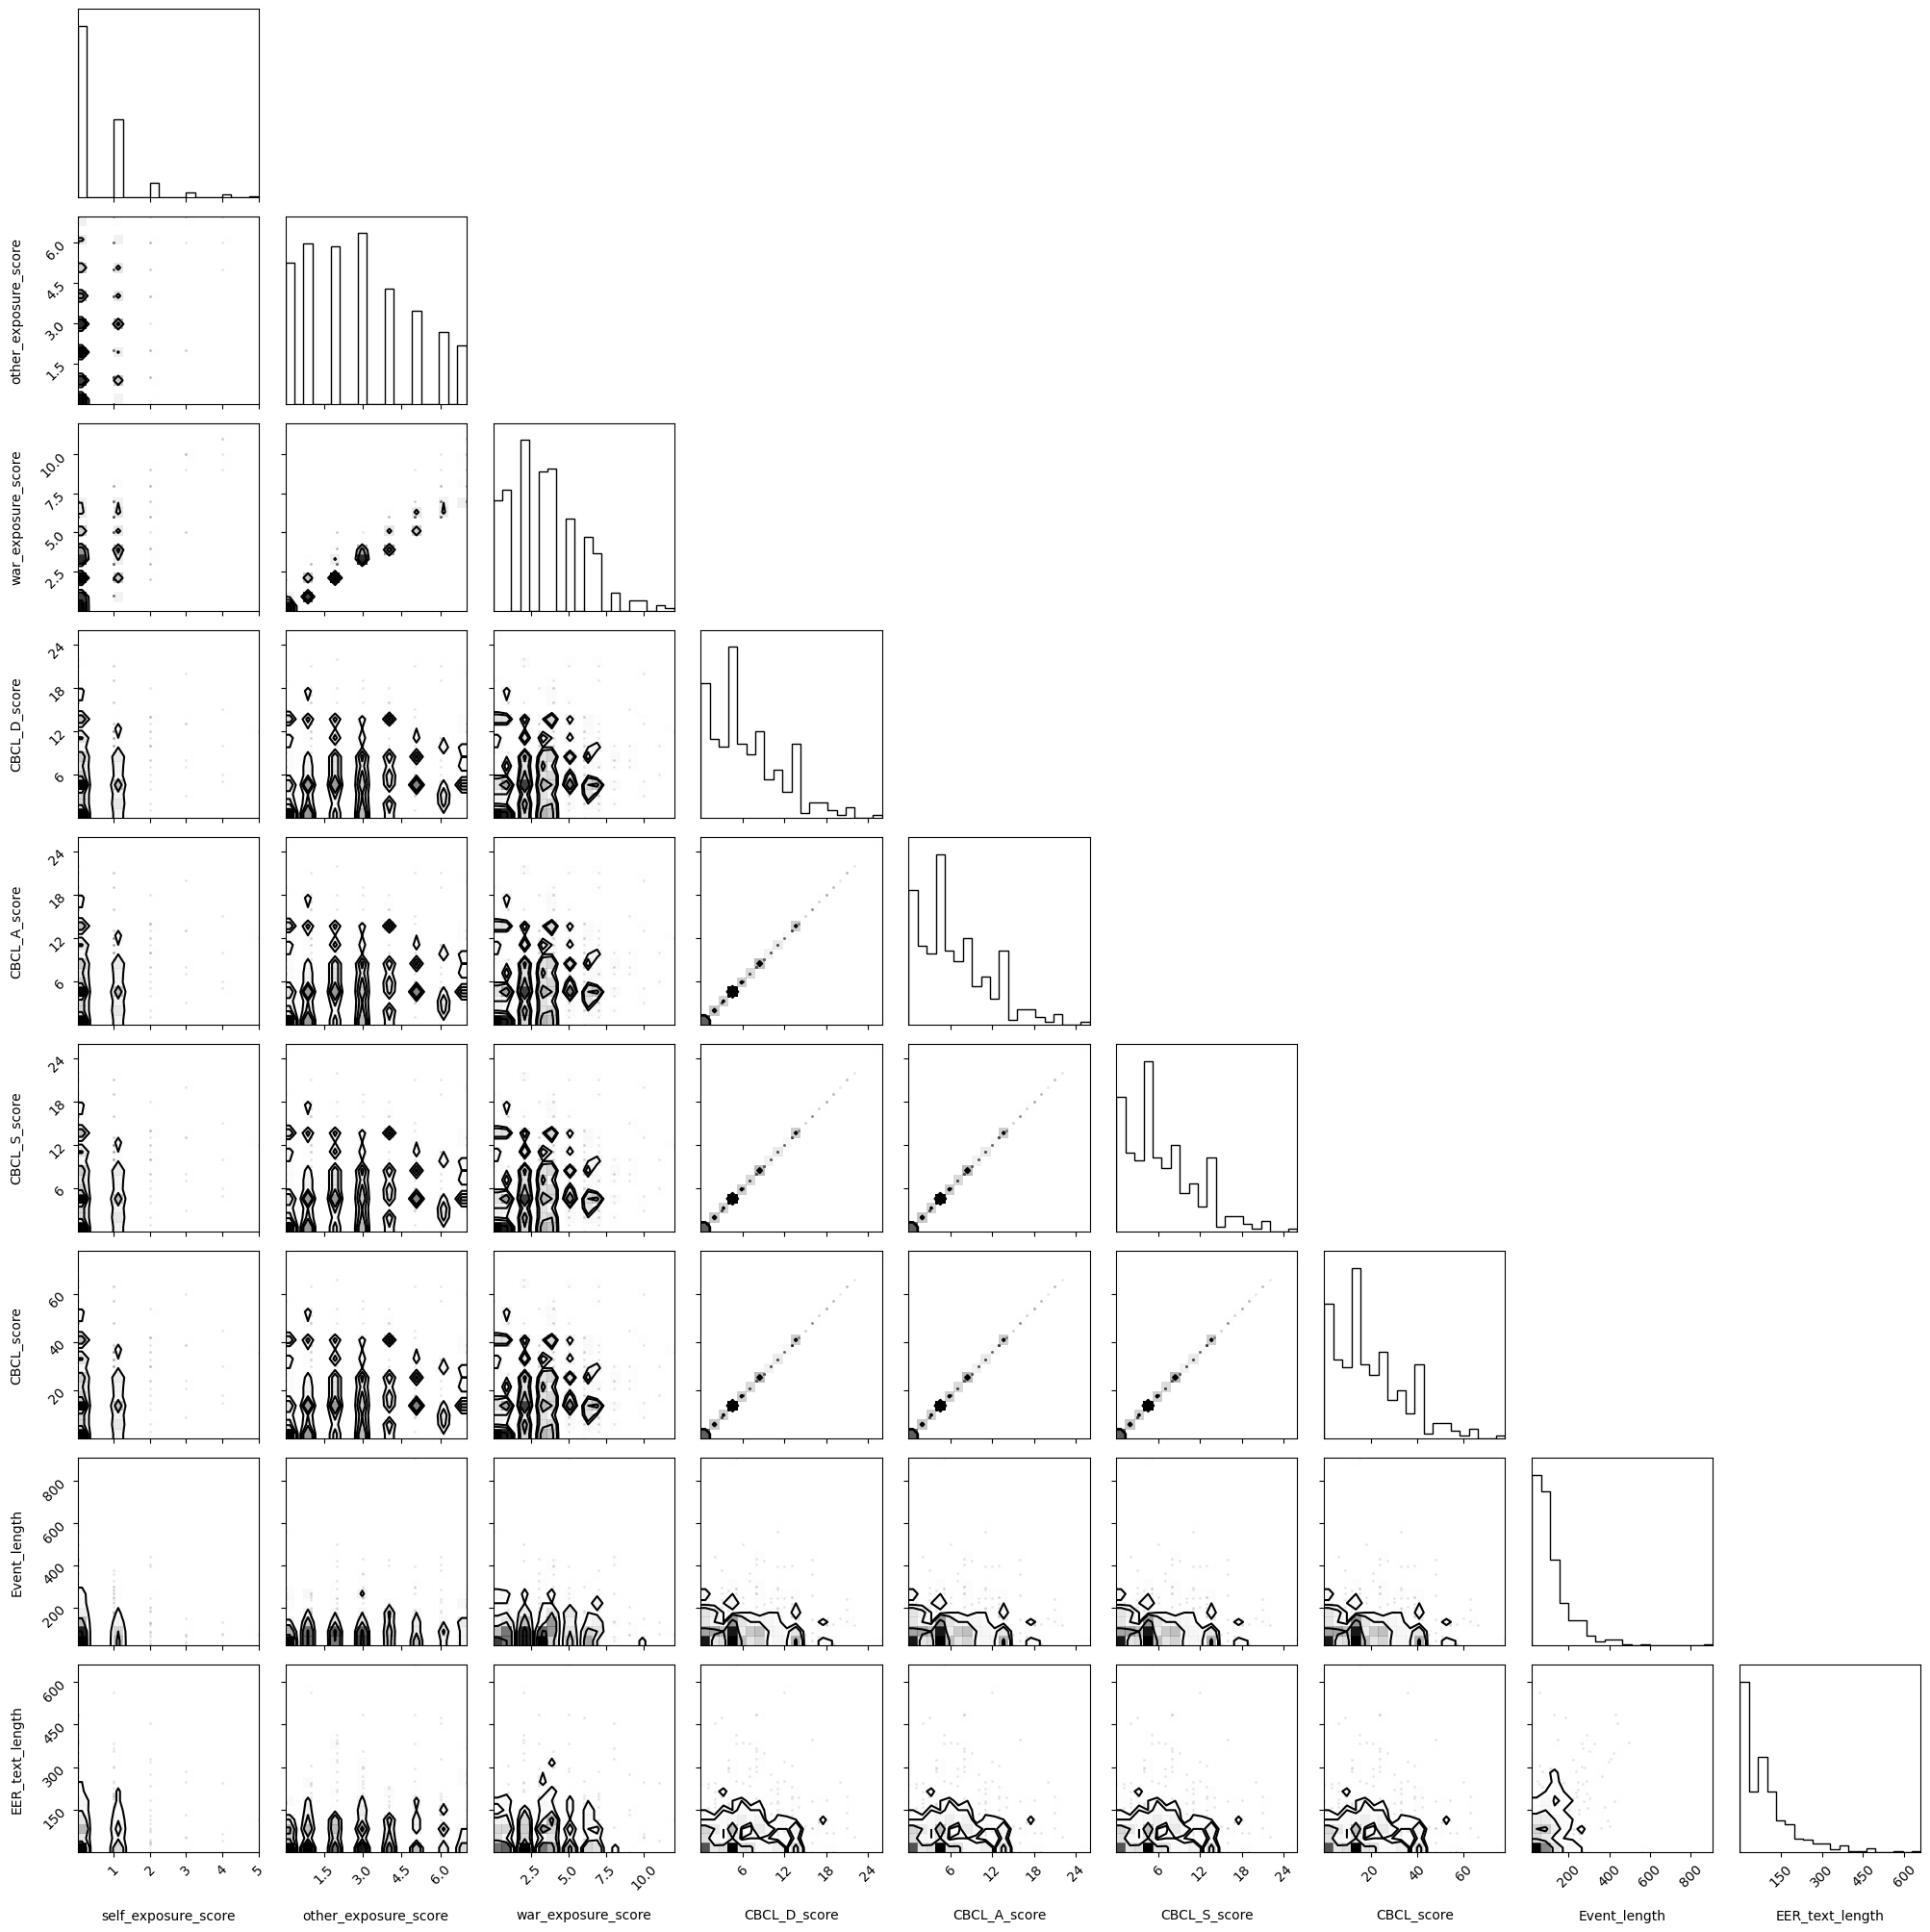

In [14]:
import corner


# Generate corner plot using ArviZ
labels = data[['self_exposure_score', 'other_exposure_score', 'war_exposure_score','CBCL_D_score', 'CBCL_A_score', 'CBCL_S_score', 'CBCL_score', 'Event_length', 'EER_text_length']].columns.tolist()  # Get column names as labels
figure = corner.corner(data[['self_exposure_score', 'other_exposure_score', 'war_exposure_score','CBCL_D_score', 'CBCL_A_score', 'CBCL_S_score', 'CBCL_score', 'Event_length', 'EER_text_length']].values, labels=labels, quiet = True)
plt.tight_layout()
plt.show()

In [15]:
import seaborn as sns

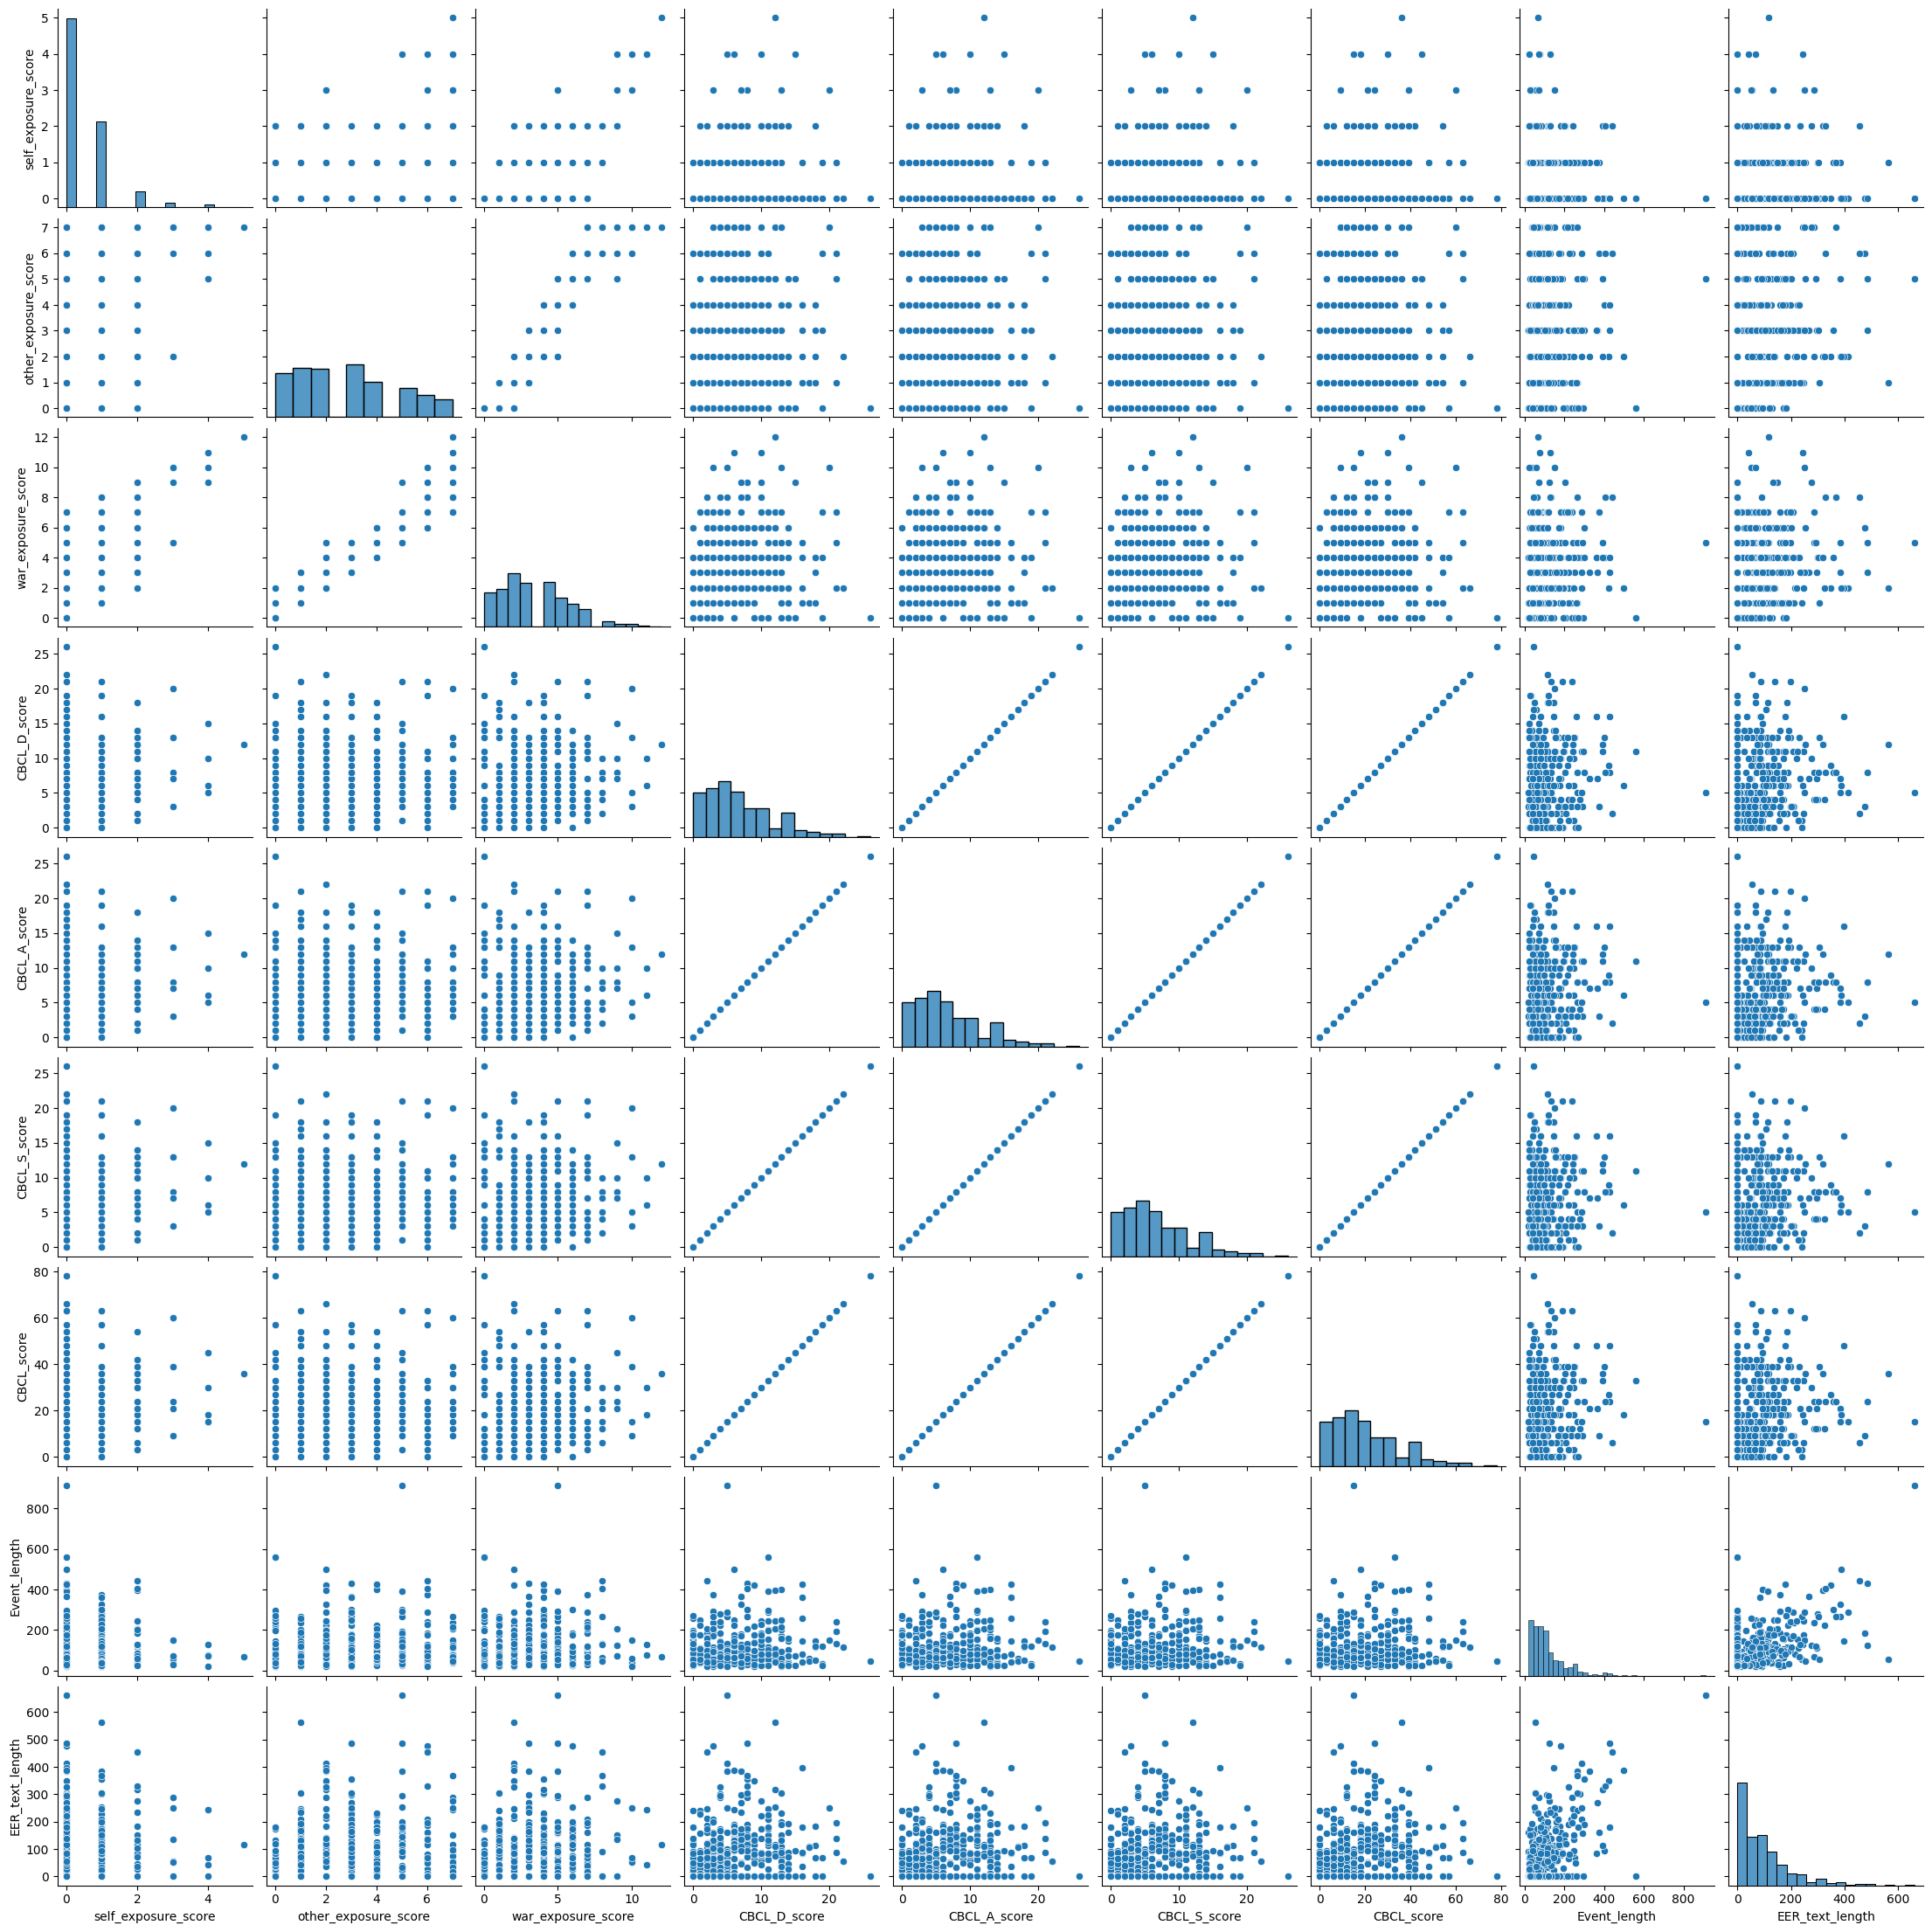

In [16]:
sns.pairplot(data[['self_exposure_score', 'other_exposure_score', 'war_exposure_score','CBCL_D_score', 'CBCL_A_score', 'CBCL_S_score', 'CBCL_score', 'Event_length', 'EER_text_length']])

In [17]:
data[['self_exposure_score', 'other_exposure_score', 'war_exposure_score','CBCL_D_score', 'CBCL_A_score', 'CBCL_S_score', 'CBCL_score', 'Event_length', 'EER_text_length']].corr()

,self_exposure_score,other_exposure_score,war_exposure_score,CBCL_D_score,CBCL_A_score,CBCL_S_score,CBCL_score,Event_length,EER_text_length
self_exposure_score,1.000000,0.273326,0.566582,0.155091,0.155091,0.155091,0.155091,-0.032834,0.081228
other_exposure_score,0.273326,1.000000,0.947490,0.097494,0.097494,0.097494,0.097494,0.117413,0.131980
war_exposure_score,0.566582,0.947490,1.000000,0.135075,0.135075,0.135075,0.135075,0.089663,0.140061
CBCL_D_score,0.155091,0.097494,0.135075,1.000000,1.000000,1.000000,1.000000,0.078094,0.103687
CBCL_A_score,0.155091,0.097494,0.135075,1.000000,1.000000,1.000000,1.000000,0.078094,0.103687
CBCL_S_score,0.155091,0.097494,0.135075,1.000000,1.000000,1.000000,1.000000,0.078094,0.103687
CBCL_score,0.155091,0.097494,0.135075,1.000000,1.000000,1.000000,1.000000,0.078094,0.103687
Event_length,-0.032834,0.117413,0.089663,0.078094,0.078094,0.078094,0.078094,1.000000,0.510122
EER_text_length,0.081228,0.131980,0.140061,0.103687,0.103687,0.103687,0.103687,0.510122,1.000000


In [18]:
data2 = pd.read_excel(url)

In [19]:
panas_pre_features = ['panas_pre1', 'panas_pre2', 'panas_pre3', 'panas_pre4', 'panas_pre5']
panas_pro_features = ['panas_pro1', 'panas_pro2', 'panas_pro3', 'panas_pro4', 'panas_pro5']



data2['panas_pre_score'] = np.sum(data2[panas_pre_features], axis=1)
data2['panas_pro_score'] = np.sum(data2[panas_pro_features], axis=1)
data2['panas_delta'] = data2['panas_pre_score'] - data2['panas_pro_score']

In [20]:
data2['Event_length'] = data2['Event'].str.len()
data2['EER_text_length'] = data2['EER_text'].str.len()

data2['EER_text_length'] = data2['EER_text_length'].fillna(0)

In [21]:
data2 = data2[np.sum(data2[panas_pre_features + panas_pro_features].isna(), axis=1) == 0]

In [22]:
data2.shape

(583, 349)

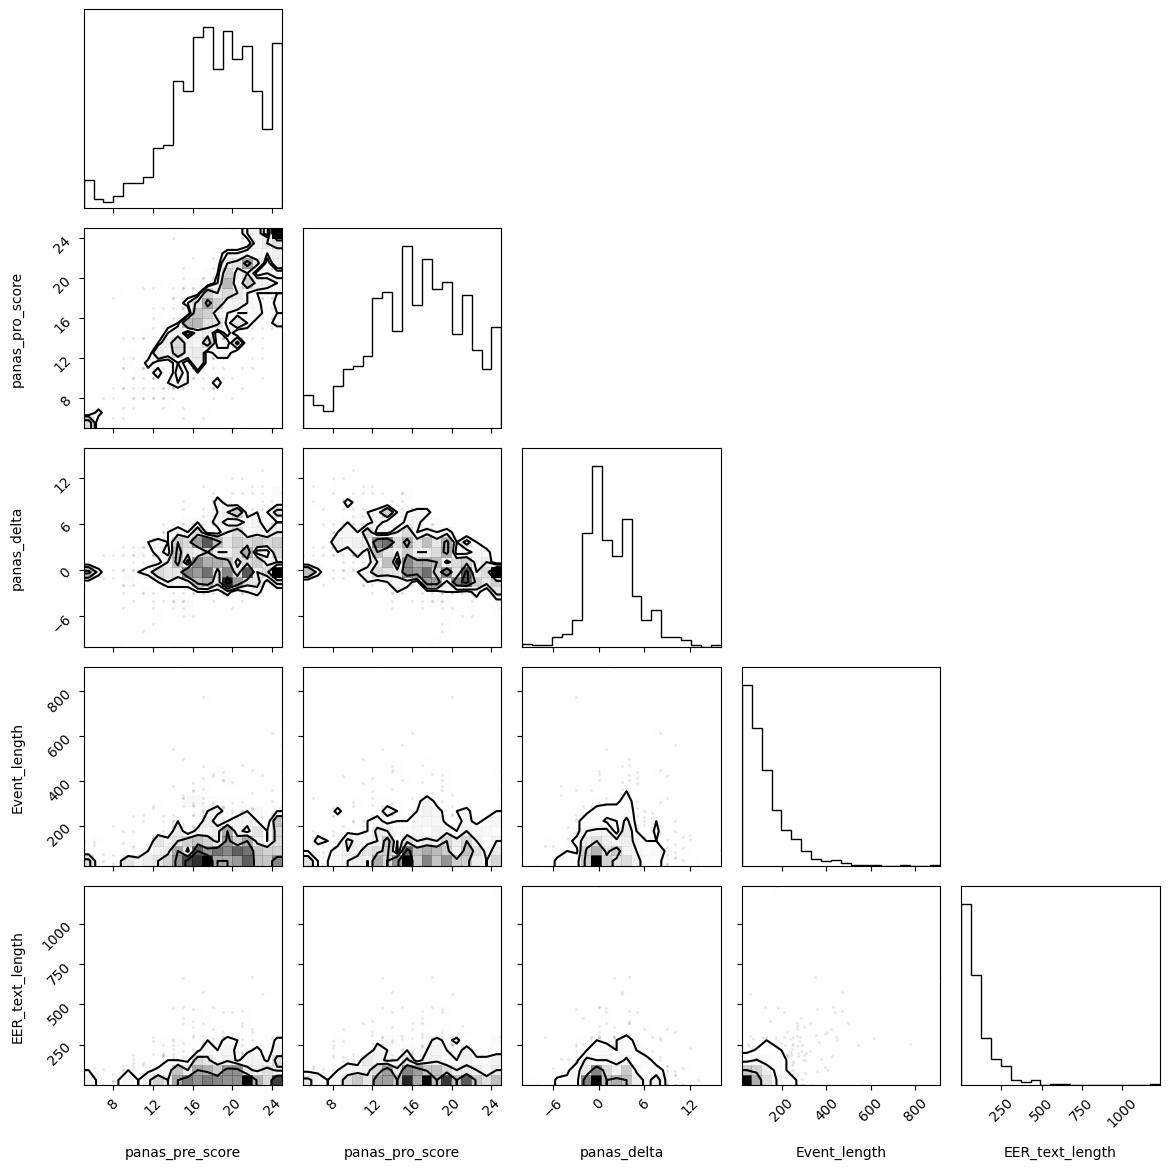

In [23]:
# Generate corner plot using ArviZ
labels = data2[['panas_pre_score', 'panas_pro_score', 'panas_delta', 'Event_length', 'EER_text_length']].columns.tolist()  # Get column names as labels
figure = corner.corner(data2[['panas_pre_score', 'panas_pro_score', 'panas_delta', 'Event_length', 'EER_text_length']].values, labels=labels, quiet = True)
plt.tight_layout()
plt.show()

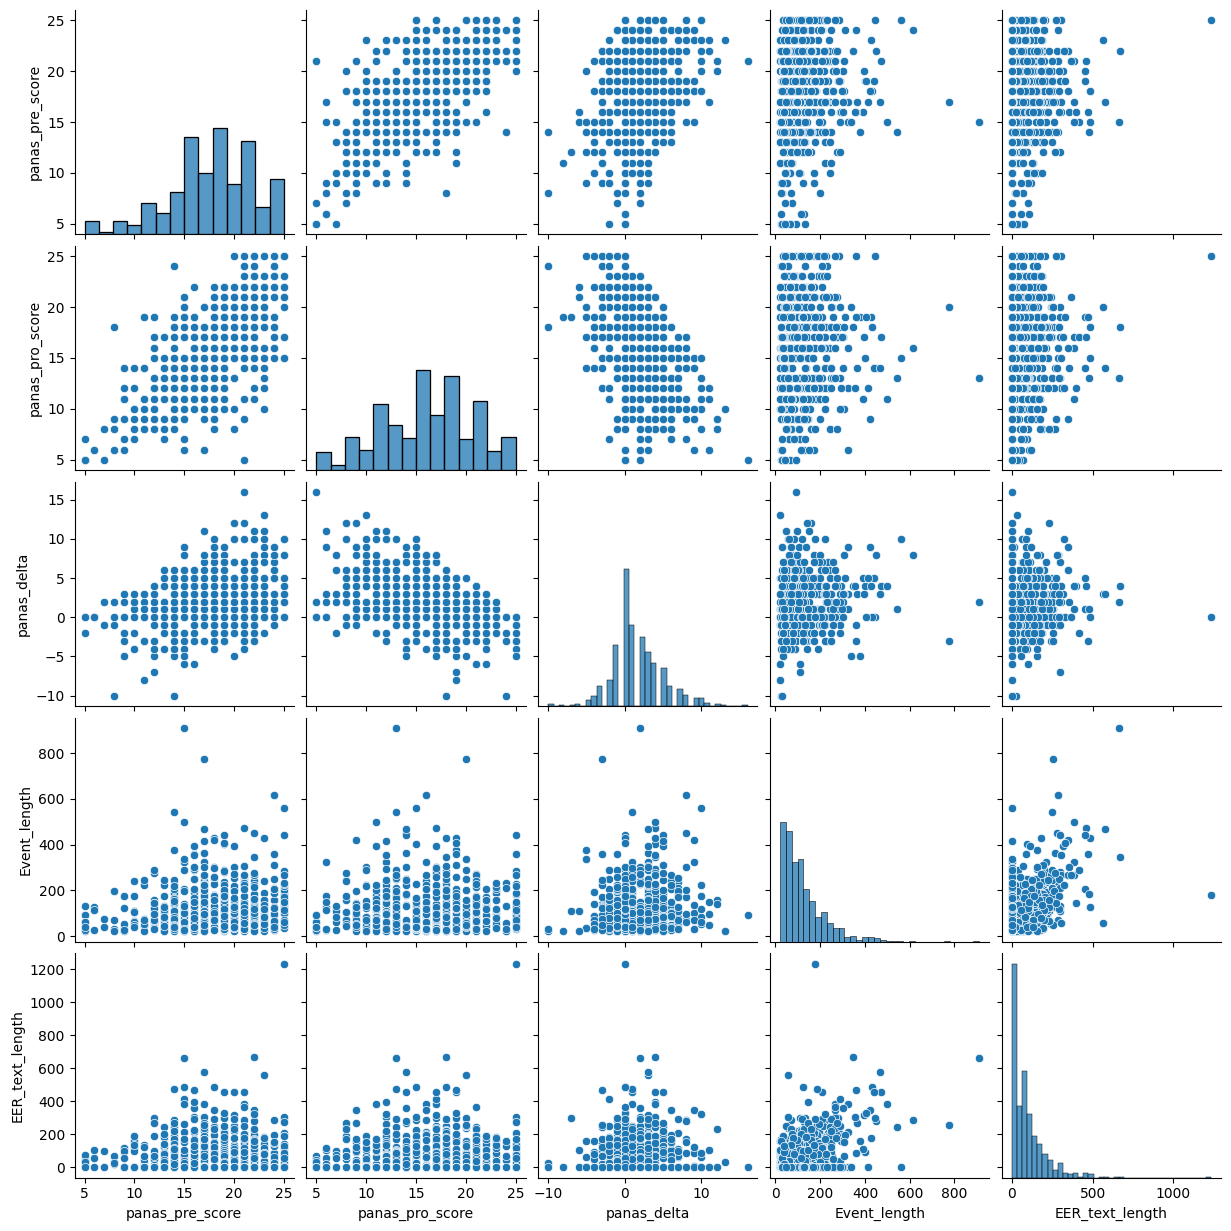

In [24]:
sns.pairplot(data2[['panas_pre_score', 'panas_pro_score', 'panas_delta', 'Event_length', 'EER_text_length']])

In [25]:
data2[['panas_pre_score', 'panas_pro_score', 'panas_delta', 'Event_length', 'EER_text_length']].corr()

,panas_pre_score,panas_pro_score,panas_delta,Event_length,EER_text_length
panas_pre_score,1.000000,0.738599,0.260191,0.135977,0.098576
panas_pro_score,0.738599,1.000000,-0.458749,0.029745,0.070614
panas_delta,0.260191,-0.458749,1.000000,0.136623,0.028792
Event_length,0.135977,0.029745,0.136623,1.000000,0.468664
EER_text_length,0.098576,0.070614,0.028792,0.468664,1.000000


In [26]:
pip install hebrew_tokenizer

  Preparing metadata (setup.py) ... done
  Created wheel for hebrew_tokenizer: filename=hebrew_tokenizer-2.3.0-py3-none-any.whl size=13416 sha256=8dc7dac9d7b7d17debe96f54b3e290436163359761be071d467d2f68b90a1c5b
  Stored in directory: /root/.cache/pip/wheels/e2/7d/65/86a00f98ea3dace8b53561300be8a0a73a41a6b5d0cd34a1f2
Successfully built hebrew_tokenizer


In [27]:
import pandas as pd
from collections import Counter
import re
import hebrew_tokenizer as ht  # from `hebrew_tokenizer` package

# ===== 1. הגדרות כלליות =====

# סטופ וורדס בסיסי בעברית (תוכל להרחיב)
HEBREW_STOPWORDS = {
    "של","על","עם","זה","אך","או","אם","אז","אבל","כי","לא","כן","הוא","היא",
    "הם","הן","אני","את","אתה","אנחנו","אתם","אתן","מה","מי","מתי","איך",
    "כל","גם","יש","אין","היה","הייתה","היתה","להיות","וכן","וכו",
    "עוד","כאן","שם","אצל","יותר","פחות","מאוד","ממש"
}

# תחיליות נפוצות: ו,ב,ל,כ,מ,ש,ה
PREFIX_LETTERS = set("ובלכמשה")


# ===== 2. פונקציות עזר =====

def clean_text_basic(text: str) -> str:
    """
    ניקוי ראשוני: להפוך ל-string, להוריד ניקוד וסימנים מוזרים, לאחד רווחים.
    """
    if pd.isna(text):
        return ""
    text = str(text)

    # להוריד ניקוד ועזרי ניקוד (טווח יוניקוד של ניקוד עברי)
    text = re.sub(r"[\u0591-\u05C7]", "", text)

    # להחליף כל מיני תווי שליטה/טב וכד' ברווח
    text = re.sub(r"[\t\r\n]+", " ", text)

    # לאחד רווחים
    text = re.sub(r"\s+", " ", text)

    return text.strip()


def tokenize_hebrew(text: str):
    """
    שימוש ב-hebrew_tokenizer כדי לקבל רק טוקנים עבריים.
    בהתאם למבנה של הספרייה: type == "HEBREW"
    """
    tokens = []
    for tok_type, token, token_num, span in ht.tokenize(text):
        if tok_type == "HEBREW":
            tokens.append(token)
    return tokens


def strip_prefixes(word: str, min_len_after: int = 3) -> str:
    """
    חיתוך תחיליות נפוצות (ו,ב,ל,כ,מ,ש,ה) בצורה קצת יותר עדינה:
    - חותך רצף תחיליות רק כל עוד נשארת מילה באורך סביר (>= min_len_after)
    - לדוגמה: 'ובבית' -> 'בית', 'ולשמוע' -> 'שמע' (אם ממשיכים), אבל
      'ומלחמה' יישאר 'מלחמה' כי אחרי חיתוך 'ו' נשארת מילה כבר סבירה.
    בפועל זה לא מושלם מורפולוגית, אבל טוב לסטטיסטיקה תיאורית.
    """
    w = word

    # חותכים כמה תחיליות ברצף אם צריך
    while len(w) > min_len_after and w[0] in PREFIX_LETTERS:
        w = w[1:]

    return w


def normalize_token(word: str) -> str:
    """
    נרמול מילה:
    - חיתוך תחיליות
    - הסרת רווחים/תווים לא אותיים בהתחלה/סוף
    - השארת רק אותיות עבריות
    """
    # חיתוך תחיליות
    w = strip_prefixes(word)

    # להשאיר רק אותיות עבריות (לא מספרים / לועזית / סימנים)
    w = re.sub(r"[^א-ת]", "", w)

    return w


def get_top_n_words(text_series: pd.Series, n: int = 5):
    """
    מקבל סדרה של טקסטים (למשל כל הטקסטים על טראומה)
    מחזיר רשימת (מילה, ספירה) של n המילים השכיחות ביותר.
    """
    counter = Counter()

    for raw_text in text_series:
        # ניקוי בסיסי
        text = clean_text_basic(raw_text)

        # טוקניזציה לעברית
        tokens = tokenize_hebrew(text)

        for tok in tokens:
            norm = normalize_token(tok)
            if len(norm) <= 1:
                continue
            if norm in HEBREW_STOPWORDS:
                continue
            counter[norm] += 1

    return counter.most_common(n)



/content


/usr/local/lib/python3.12/dist-packages/hebrew_tokenizer/tokenizer.py:121: FutureWarning: Possible nested set at position 843
  self.scanner = re.compile(


In [28]:
data2['Event_cleaned'] = data2['Event'].apply(clean_text_basic).apply(tokenize_hebrew)


print(data2['Event_cleaned'])

0      [שיחקתי, עם, הבן, שלי, ואז, צחק, וחייך, והדבר,...
1      [באמצע, חגיגת, יום, הולדת, ביתית, לביתי, בת, ה...
2      [בחרנו, להשאר, לישון, במקלט, בשביל, לא, להעיר,...
3      [התיסכול, בין, לריב, איתם, על, להיתחבר, לזום, ...
4      [נבהלתי, מאוד, מהאזעקות, הרבות, הילדים, הרגישו...
                             ...                        
654      [הוצאת, התסכולים, והחרדות, מהמלחמה, על, הילדים]
655    [בזמן, האחרון, יש, לי, מעט, דיכאון, שמורגש, כנ...
656      [הריכוז, בחדשות, מונע, את, היחס, הנצרך, לילדים]
657    [תחושת, חוסר, אונים, וחוסר, יכולת, להגן, על, ה...
658    [הילד, שלי, התחיל, לפספס, את, הצרכים, שלו, ובכ...
Name: Event_cleaned, Length: 583, dtype: object


In [52]:
!apt-get -qq update
!apt-get -y install golang-go git bzip2

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
bzip2 is already the newest version (1.0.8-5build1).
golang-go is already the newest version (2:1.18~0ubuntu2).
git is already the newest version (1:2.34.1-1ubuntu1.15).
0 upgraded, 0 newly installed, 0 to remove and 67 not upgraded.


In [53]:
# מגדירים GOPATH כלשהו בתוך /content
import os, subprocess, textwrap

os.environ["GOPATH"] = "/content/yapproj"

# יוצרים תיקיית עבודה
!mkdir -p /content/yapproj/src
%cd /content/yapproj/src

# שואבים את YAP
!git clone https://github.com/OnlpLab/yap.git
%cd yap

# חילוץ המודלים (הם ב-bz2)
!bunzip2 data/*.bz2

# קומפילציה
!go get .
!go build .

# בדיקה שהקובץ הופק
!ls -l ./yap

/content/yapproj/src
fatal: destination path 'yap' already exists and is not an empty directory.
/content/yapproj/src/yap
bunzip2: Can't open input file data/*.bz2: No such file or directory.
go: go.mod file not found in current directory or any parent directory.
	'go get' is no longer supported outside a module.
	To build and install a command, use 'go install' with a version,
	like 'go install example.com/cmd@latest'
	For more information, see https://golang.org/doc/go-get-install-deprecation
	or run 'go help get' or 'go help install'.
go: cannot find main module, but found .git/config in /content/yapproj/src/yap
	to create a module there, run:
	go mod init
ls: cannot access './yap': No such file or directory


In [44]:
%cd /content/yapproj/src/yap

# מריצים את השרת ברקע
!nohup ./yap api > yap_server.log 2>&1 &

/content/yapproj/src/yap


In [51]:
import requests
import json

YAP_URL = "http://localhost:8000/yap/heb/joint"

def yap_analyze(text: str):
    # YAP רוצה שני רווחים בסוף המשפט
    payload = {"text": text.strip() + "  "}
    resp = requests.get(YAP_URL, json=payload)
    # resp.raise_for_status()
    # return resp.json()

# דוגמה
text = "שיחקתי עם הבן שלי ואז צחק וחייך והילדים החטופים"
res = yap_analyze(text)
# res.keys()

ConnectionError: HTTPConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /yap/heb/joint (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7e20383c4440>: Failed to establish a new connection: [Errno 111] Connection refused'))

In [29]:
!pip install --quiet rftokenizer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 MB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 5.2 MB/s eta 0:00:00


In [38]:
!pip install --quiet "xgboost==2.0.3"

In [39]:
from rftokenizer import RFTokenizer

tok = RFTokenizer(model="heb")



In [40]:
tok.rf_tokenize(data2['Event_cleaned'][0])

XGBoostError: [16:33:56] /workspace/src/learner.cc:1182: Check failed: header == serialisation_header_: If you are loading a serialized model (like pickle in Python, RDS in R) or
configuration generated by an older version of XGBoost, please export the model by calling
`Booster.save_model` from that version first, then load it back in current version. See:

    https://xgboost.readthedocs.io/en/stable/tutorials/saving_model.html

for more details about differences between saving model and serializing.

Stack trace:
  [bt] (0) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x48c70a) [0x7e2003fb770a]
  [bt] (1) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(+0x4d06a7) [0x7e2003ffb6a7]
  [bt] (2) /usr/local/lib/python3.12/dist-packages/xgboost/lib/libxgboost.so(XGBoosterUnserializeFromBuffer+0x65) [0x7e2003c87c15]
  [bt] (3) /lib/x86_64-linux-gnu/libffi.so.8(+0x7e2e) [0x7e2081ca2e2e]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.8(+0x4493) [0x7e2081c9f493]
  [bt] (5) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x98c1) [0x7e2082ed98c1]
  [bt] (6) /usr/lib/python3.12/lib-dynload/_ctypes.cpython-312-x86_64-linux-gnu.so(+0x8ffe) [0x7e2082ed8ffe]
  [bt] (7) /usr/bin/python3(_PyObject_MakeTpCall+0x2fb) [0x53f5db]
  [bt] (8) /usr/bin/python3(_PyEval_EvalFrameDefault+0x701) [0x54a2e1]

